In [117]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [118]:
# read csv from url
url = "https://raw.githubusercontent.com/muhammadisa/crime-potential/main/crime-potential.csv"
crimepotential = pd.read_csv(url)
# show top 5 of data from data frame
crimepotential.head(5)

,person_arround,desinty_avg,night,gender,condition
0,1,0.5,1,1,1
1,5,0.1,1,0,1
2,10,0.2,0,1,0
3,20,1.0,1,1,0
4,4,2.0,0,1,0


In [119]:
# describe detail of data show you how much unique, top, req, count
crimepotential.describe()

,person_arround,desinty_avg,night,gender,condition
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,39.370370,3.085185,0.481481,0.481481,0.259259
std,48.532422,5.575613,0.509175,0.509175,0.446576
min,1.000000,0.100000,0.000000,0.000000,0.000000
25%,4.500000,0.100000,0.000000,0.000000,0.000000
50%,19.000000,0.800000,0.000000,0.000000,0.000000
75%,66.500000,2.000000,1.000000,1.000000,0.500000
max,192.000000,20.000000,1.000000,1.000000,1.000000


In [120]:
crimepotential.groupby('condition').describe().T

condition                      0          1
person_arround count   20.000000   7.000000
               mean    50.700000   7.000000
               std     51.669089  10.115994
               min      3.000000   1.000000
               25%      7.750000   1.500000
               50%     29.500000   2.000000
               75%     90.000000   7.000000
               max    192.000000  29.000000
desinty_avg    count   20.000000   7.000000
               mean     2.975000   3.400000
               std      5.042647   7.350737
               min      0.100000   0.100000
               25%      0.100000   0.150000
               50%      0.900000   0.500000
               75%      2.250000   1.450000
               max     20.000000  20.000000
night          count   20.000000   7.000000
               mean     0.400000   0.714286
               std      0.502625   0.487950
               min      0.000000   0.000000
               25%      0.000000   0.500000
               50%      0.000000   1.000000
               75%      1.000000   1.000000
               max      1.000000   1.000000
gender         count   20.000000   7.000000
               mean     0.500000   0.428571
               std      0.512989   0.534522
               min      0.000000   0.000000
               25%      0.000000   0.000000
               50%      0.500000   0.000000
               75%      1.000000   1.000000
               max      1.000000   1.000000

In [121]:
# finding null or zeroth values inside data frame
crimepotential.isnull().values.any()

False

In [122]:
# filter danger and safe condition using array manipulation syntaxes
danger_condition = crimepotential[crimepotential.condition == 1]
safe_condition = crimepotential[crimepotential.condition == 0]

/home/stoic/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


285.7142857142857

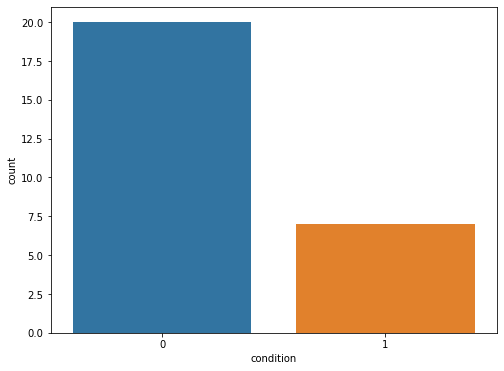

In [123]:
# we can observe imbalance data here
plt.figure(figsize=(8,6))
sns.countplot(crimepotential.condition)
(len(safe_condition)/len(danger_condition))*100

In [124]:
# create array of column names of features and predicted class from data frame
feature_columns = ['person_arround','desinty_avg','night','gender']
predicted_class = ['condition']

In [125]:
# assign X as feature column and y as predicted label 
X = crimepotential[feature_columns].values
y = crimepotential[predicted_class].values
# split 10 percent of train data for testing data with randomized state 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [130]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train.ravel())
#ada 50 orang di sekitar kamu dengan jarak rata2 1 meter dari kamu di malam hari, kamu dalam bahaya apa enggak?
predictions = clf.predict_proba([[50, 0.1, 1, 0]])
print(predictions)

[[0.8 0.2]]


In [127]:
print("accuracy {0:.3f}".format(accuracy_score(y_test, predictions)))

accuracy 1.000
